In [ ]:
# 15. Rock, Paper, Guessers ?





In [2]:
import sys
sys.path.append("/home/richard/Git/ivpy/src/")

In [4]:
import requests
from ivpy import attach,show,compose,montage,histogram,scatter
import pandas as pd
import altair as alt
req = pd.read_csv('https://api.vam.ac.uk/v2/objects/search?images_exist=true&page=1&page_size=15&q=marbled+paper&response_format=csv')
req.head()

,accessionNumber,accessionYear,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,E.1440-1959,1959,O567741,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4033,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
1,E.1441-1959,1959,O567740,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4045,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
2,E.1442-1959,1959,O567739,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4044,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
3,E.1443-1959,1959,O567738,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4034,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False
4,E.1444-1959,1959,O567737,Paper,NaN,Britain,E. W. Morris,made,1886,2022NF4035,paper,marbling,NaN,"Prints & Drawings Study Room, level C",False,False


In [5]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
req._primaryImageId = [IIIF_IMAGE_URL % item for item in req._primaryImageId]

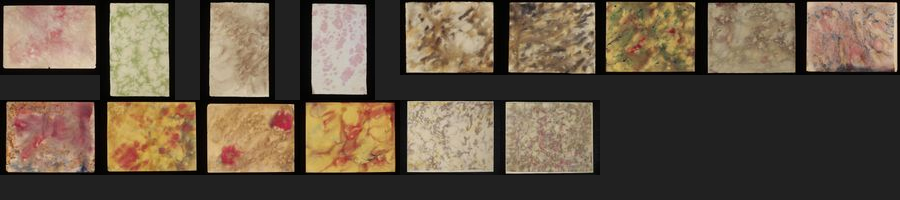

In [7]:
attach(req, "_primaryImageId")
show()

In [11]:
req_dri = requests.get('https://repository.dri.ie/iiif/q524zh496/sequence.json')
stone_axe_slices = req_dri.json()

In [26]:
import random

axe_samples = []
for canvas in random.choices(stone_axe_slices['sequences'][0]['canvases'], k=10):
    print(canvas['images'][0]['resource']['@id'])
    thumbnail_img = canvas['images'][0]['resource']['@id'].replace("/full/full/", "/full/!100,100/")
    axe_samples.append(thumbnail_img)

axe_df = pd.DataFrame(axe_samples)

axe_df
    

https://repository.dri.ie/loris/mc883j99s:ms367435g/full/full/0/default.jpg
https://repository.dri.ie/loris/q237xm706:q524zh542/full/full/0/default.jpg
https://repository.dri.ie/loris/rb69b659z:rj43d0275/full/full/0/default.jpg
https://repository.dri.ie/loris/4b29r1717:4f16rx55x/full/full/0/default.jpg
https://repository.dri.ie/loris/0z70pr17t:1544rh85j/full/full/0/default.jpg
https://repository.dri.ie/loris/7p88sb309:7s75t7145/full/full/0/default.jpg
https://repository.dri.ie/loris/x346sz909:x633tv745/full/full/0/default.jpg
https://repository.dri.ie/loris/9c689g54j:9s16f190f/full/full/0/default.jpg
https://repository.dri.ie/loris/rn30dw12m:rr17fr96z/full/full/0/default.jpg
https://repository.dri.ie/loris/h1292846n:hh646q666/full/full/0/default.jpg


,0
0,https://repository.dri.ie/loris/mc883j99s:ms36...
1,https://repository.dri.ie/loris/q237xm706:q524...
2,https://repository.dri.ie/loris/rb69b659z:rj43...
3,https://repository.dri.ie/loris/4b29r1717:4f16...
4,https://repository.dri.ie/loris/0z70pr17t:1544...
5,https://repository.dri.ie/loris/7p88sb309:7s75...
6,https://repository.dri.ie/loris/x346sz909:x633...
7,https://repository.dri.ie/loris/9c689g54j:9s16...
8,https://repository.dri.ie/loris/rn30dw12m:rr17...
9,https://repository.dri.ie/loris/h1292846n:hh64...


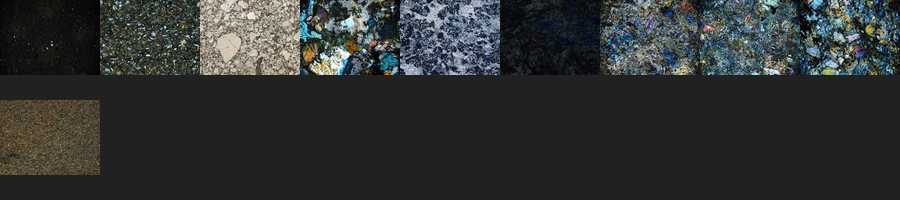

In [27]:
attach(axe_df, 0)
show()